In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Just looking at the data.

In [3]:
!head ../data/raw/consumption/LD2011_2014.txt

"";"MT_001";"MT_002";"MT_003";"MT_004";"MT_005";"MT_006";"MT_007";"MT_008";"MT_009";"MT_010";"MT_011";"MT_012";"MT_013";"MT_014";"MT_015";"MT_016";"MT_017";"MT_018";"MT_019";"MT_020";"MT_021";"MT_022";"MT_023";"MT_024";"MT_025";"MT_026";"MT_027";"MT_028";"MT_029";"MT_030";"MT_031";"MT_032";"MT_033";"MT_034";"MT_035";"MT_036";"MT_037";"MT_038";"MT_039";"MT_040";"MT_041";"MT_042";"MT_043";"MT_044";"MT_045";"MT_046";"MT_047";"MT_048";"MT_049";"MT_050";"MT_051";"MT_052";"MT_053";"MT_054";"MT_055";"MT_056";"MT_057";"MT_058";"MT_059";"MT_060";"MT_061";"MT_062";"MT_063";"MT_064";"MT_065";"MT_066";"MT_067";"MT_068";"MT_069";"MT_070";"MT_071";"MT_072";"MT_073";"MT_074";"MT_075";"MT_076";"MT_077";"MT_078";"MT_079";"MT_080";"MT_081";"MT_082";"MT_083";"MT_084";"MT_085";"MT_086";"MT_087";"MT_088";"MT_089";"MT_090";"MT_091";"MT_092";"MT_093";"MT_094";"MT_095";"MT_096";"MT_097";"MT_098";"MT_099";"MT_100";"MT_101";"MT_102";"MT_103";"MT_104";"MT_105";"MT_106";"MT_107";"MT_108";"MT_109";"MT_110";"MT_111

Now we have enough info to load the data.

Looking at the readme, zero value means no data. It would be better to mark them as missing.

In [2]:
consumption_ld = pd.read_csv('../data/raw/consumption/LD2011_2014.txt', sep=';',
                             decimal=',', parse_dates=[0], na_values=0)

In [3]:
consumption_ld.head()

Unnamed: 0  MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
0 2011-01-01 00:15:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1 2011-01-01 00:30:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2 2011-01-01 00:45:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3 2011-01-01 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4 2011-01-01 01:15:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   MT_008  MT_009   ...    MT_361  MT_362  MT_363  MT_364  MT_365  MT_366  \
0     NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN   

   MT_367  MT_368  MT_369  MT_370  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN  

[5 rows x 371 columns]

In [4]:
consumption_ld.shape

(140256, 371)

In [5]:
consumption_ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140256 entries, 0 to 140255
Columns: 371 entries, Unnamed: 0 to MT_370
dtypes: datetime64[ns](1), float64(370)
memory usage: 398.1 MB


We rename the first column and set it as index.

In [6]:
consumption_ld.rename(columns={consumption_ld.columns[0]:'Time'}, inplace=True)
consumption_ld.set_index('Time', inplace=True)

In [7]:
consumption_ld.head()

MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
Time                                                                          
2011-01-01 00:15:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2011-01-01 00:30:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2011-01-01 00:45:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2011-01-01 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2011-01-01 01:15:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                     MT_008  MT_009  MT_010   ...    MT_361  MT_362  MT_363  \
Time                                          ...                             
2011-01-01 00:15:00     NaN     NaN     NaN   ...       NaN     NaN     NaN   
2011-01-01 00:30:00     NaN     NaN     NaN   ...       NaN     NaN     NaN   
2011-01-01 00:45:00     NaN     NaN     NaN   ...       NaN     NaN     NaN   
2011-01-01 01:00:00     NaN     NaN     NaN   ...       NaN     NaN     NaN   
2011-01-01 01:15:00     NaN     NaN     NaN   ...       NaN     NaN     NaN   

                     MT_364  MT_365  MT_366  MT_367  MT_368  MT_369  MT_370  
Time                                                                         
2011-01-01 00:15:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2011-01-01 00:30:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2011-01-01 00:45:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2011-01-01 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2011-01-01 01:15:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 370 columns]

In [8]:
consumption_ld.tail()

MT_001     MT_002    MT_003      MT_004     MT_005  \
Time                                                                        
2014-12-31 23:00:00  2.538071  22.048364  1.737619  150.406504  85.365854   
2014-12-31 23:15:00  2.538071  21.337127  1.737619  166.666667  81.707317   
2014-12-31 23:30:00  2.538071  20.625889  1.737619  162.601626  82.926829   
2014-12-31 23:45:00  1.269036  21.337127  1.737619  166.666667  85.365854   
2015-01-01 00:00:00  2.538071  19.914651  1.737619  178.861789  84.146341   

                         MT_006     MT_007      MT_008     MT_009     MT_010  \
Time                                                                           
2014-12-31 23:00:00  303.571429  11.305822  282.828283  68.181818  72.043011   
2014-12-31 23:15:00  324.404762  11.305822  252.525253  64.685315  72.043011   
2014-12-31 23:30:00  318.452381  10.175240  242.424242  61.188811  74.193548   
2014-12-31 23:45:00  285.714286  10.175240  225.589226  64.685315  72.043011   
2015-01-01 00:00:00  279.761905  10.175240  249.158249  62.937063  69.892473   

                        ...           MT_361  MT_362       MT_363  \
Time                    ...                                         
2014-12-31 23:00:00     ...       276.945039   28200  1616.033755   
2014-12-31 23:15:00     ...       279.800143   28300  1569.620253   
2014-12-31 23:30:00     ...       284.796574   27800  1556.962025   
2014-12-31 23:45:00     ...       246.252677   28000  1443.037975   
2015-01-01 00:00:00     ...       188.436831   27800  1409.282700   

                          MT_364     MT_365    MT_366      MT_367      MT_368  \
Time                                                                            
2014-12-31 23:00:00  1363.636364  29.986962  5.851375  697.102722  176.961603   
2014-12-31 23:15:00  1340.909091  29.986962  9.947338  671.641791  168.614357   
2014-12-31 23:30:00  1318.181818  27.379400  9.362200  670.763828  153.589316   
2014-12-31 23:45:00   909.090909  26.075619  4.095963  664.618086  146.911519   
2015-01-01 00:00:00   954.545455  27.379400  4.095963  628.621598  131.886477   

                         MT_369       MT_370  
Time                                          
2014-12-31 23:00:00  651.026393  7621.621622  
2014-12-31 23:15:00  669.354839  6702.702703  
2014-12-31 23:30:00  670.087977  6864.864865  
2014-12-31 23:45:00  646.627566  6540.540541  
2015-01-01 00:00:00  673.020528  7135.135135  

[5 rows x 370 columns]

We have the data from 2011 to 2015 but how many non nans?

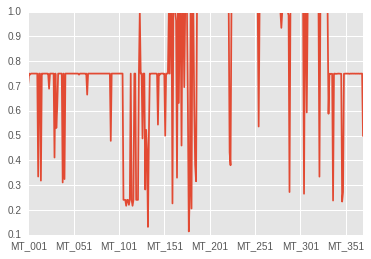

In [9]:
(consumption_ld.count() / len(consumption_ld)).plot()

Some "buildings" have very little data. We will have to drop those. But which ones?

In [11]:
from ipywidgets import interact, IntSlider
from datetime import date

In [12]:
from bokeh.charts import Scatter, output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [10]:
consumption_ld_zeros = consumption_ld.fillna(value=0)

How do the daily profiles look like?

In [14]:
def plot_daily_consumption(year, month, day, id):
    year, month, day, id = map(int, [year, month, day, id])
    sub_data = consumption_ld_zeros.loc[date(year, month, day).strftime('%Y-%m-%d'), 'MT_{:03d}'.format(id)]
    sub_data.plot()
    plt.show()

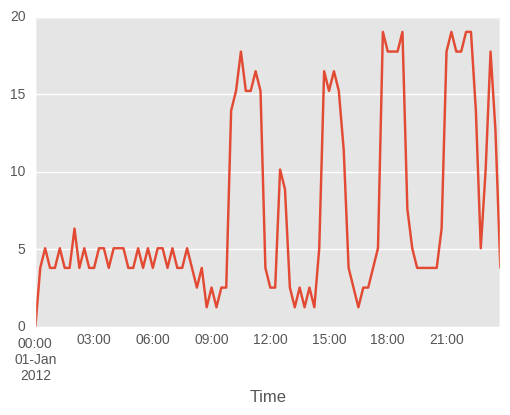

In [15]:
interact(plot_daily_consumption, year=IntSlider(value=2011, min=2011, max=2014, step=1),
                                 month=IntSlider(value=1, min=1, max=12, step=1),
                                 day=IntSlider(value=1, min=1, max=31, step=1),
                                 id=IntSlider(value=1, min=1, max=370, step=1))

Some profiles have very small number of different values. Is this just one machine observed? Is there a limited accuracy?

In [16]:
value_counts = [pd.unique(consumption_ld.iloc[:,x-1]).shape[0] for x in range(1, 371)]

In [17]:
different_values = pd.DataFrame({'id':range(1, 371), 'different_values': value_counts})

In [18]:
tooltips=[
    ('Id', '@id'),
    ('Diffs', '@different_values')
]

g = Scatter(data=different_values, x='id', y='different_values',
            tooltips=tooltips, plot_width=800, plot_height=400)
show(g)

In [19]:
maxes, quants_95 = consumption_ld.max(), consumption_ld.quantile(q=0.95)

In [20]:
data_ = pd.concat([maxes, quants_95], axis=1).reset_index()
data_.columns = ['id', 'max', 'quant_95']

In [21]:
data_.head()

id         max    quant_95
0  MT_001   48.223350   17.766497
1  MT_002  115.220484   39.118065
2  MT_003  151.172893    4.344049
3  MT_004  321.138211  191.056911
4  MT_005  150.000000   84.146341

In [22]:
tooltips=[
    ('Id', '@id'),
    ('Max', '@max'),
    ('Quant 95', '@quant_95')
]

g = Scatter(data=data_, x='max', y='quant_95', tooltips=tooltips)
show(g)

Which months have the most complete data?

In [23]:
consumption_ld.loc[date(2011, 2, 1).strftime('%Y-%m'), 'MT_{:03d}'.format(1)].count()

0

In [24]:
consumption_ld_zeros.loc[date(2011, 2, 1).strftime('%Y-%m'), 'MT_{:03d}'.format(1)].count()

2688

In [25]:
complete_months = []
for id_ in range(1,371):
    for year in range(2011, 2015):
        for month in range(1,13):
            datum = {}
            datum['id'] = id_
            datum['year'] = year
            datum['month'] = month
            subdata = consumption_ld.loc[date(year, month, 1).strftime('%Y-%m-%d'),
                                               'MT_{:03d}'.format(id_)]
            datum['complete'] = subdata.count() / len(subdata)
            complete_months.append(datum)

In [26]:
complete_df = pd.DataFrame(complete_months)

In [27]:
complete_df.head()

complete  id  month  year
0       0.0   1      1  2011
1       0.0   1      2  2011
2       0.0   1      3  2011
3       0.0   1      4  2011
4       0.0   1      5  2011

In [30]:
import os

In [31]:
if not os.path.exists('analysis_data'):
    !mkdir analysis_data

In [32]:
complete_df.to_csv('analysis_data/consumption_complete_months.csv', index=False)

In [38]:
(complete_df[complete_df['complete'] == 1.]
 .groupby(by=['year', 'month'], as_index=False)['id']
 .count()
 .rename(columns={'id':'count'})
 .sort_values('count', ascending=False))

year  month  count
43  2014      8    363
47  2014     12    362
45  2014     10    362
46  2014     11    361
44  2014      9    361
42  2014      7    360
41  2014      6    360
40  2014      5    360
39  2014      4    359
38  2014      3    358
37  2014      2    354
36  2014      1    342
35  2013     12    341
33  2013     10    340
34  2013     11    339
32  2013      9    337
30  2013      7    335
31  2013      8    334
25  2013      2    331
29  2013      6    331
26  2013      3    331
28  2013      5    330
27  2013      4    330
24  2013      1    328
23  2012     12    325
20  2012      9    323
22  2012     11    322
21  2012     10    322
19  2012      8    322
18  2012      7    322
15  2012      4    319
17  2012      6    318
16  2012      5    317
14  2012      3    316
13  2012      2    316
4   2011      5    160
10  2011     11    160
12  2012      1    160
8   2011      9    159
6   2011      7    158
5   2011      6    158
0   2011      1    158
7   2011      8    158
9   2011     10    158
11  2011     12    158
3   2011      4    157
2   2011      3    157
1   2011      2    156

Save data in kWh format and sampled to 0.5h.

In [11]:
consumption_ld_resampled = consumption_ld.resample('30T', how='mean')

In [16]:
consumption_ld_resampled = consumption_ld_resampled / 2

In [19]:
consumption_ld_resampled.to_csv('../data/processed/consumption/ld2011_2014.csv')